In [52]:
%%time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("afmhot")
# sns.set_palette("twilight")
# sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":1.5})
sns.set_style("whitegrid")
import pylab
pylab.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')


import tensorflow as tf
print("# GPUs: ", len(tf.config.experimental.list_physical_devices("GPU")))

from tensorflow.python.client import device_lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import tensorflow.keras as tfk
from sklearn.metrics import median_absolute_error as mae, mean_squared_error as mse,\
explained_variance_score as evs

# GPUs:  1
CPU times: total: 0 ns
Wall time: 1e+03 µs


In [2]:
import tensorflow as tf
print("# GPUs: ", len(tf.config.experimental.list_physical_devices("GPU")))

# GPUs:  1


In [40]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [41]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

In [10]:
len(train_images), len(test_images)

(60000, 10000)

In [14]:
labels = pd.DataFrame(test_labels)
labels.value_counts()

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64

In [33]:
len(train_images[0])

28

C:\Users\diablo\AppData\Local\Temp\ipykernel_14528\2862198986.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


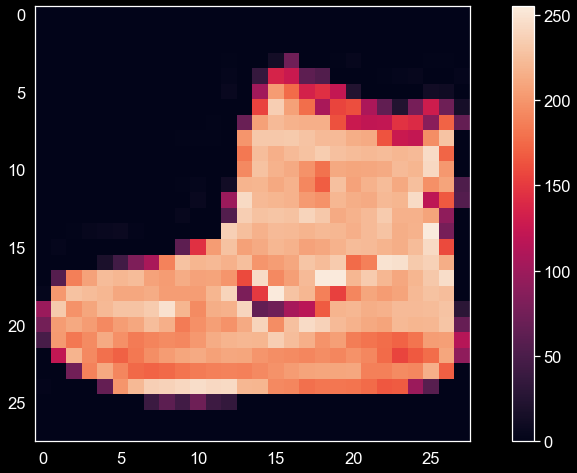

In [31]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [42]:
%%time
train_images = train_images/255.00
test_images = test_images/255.00

CPU times: total: 188 ms
Wall time: 174 ms


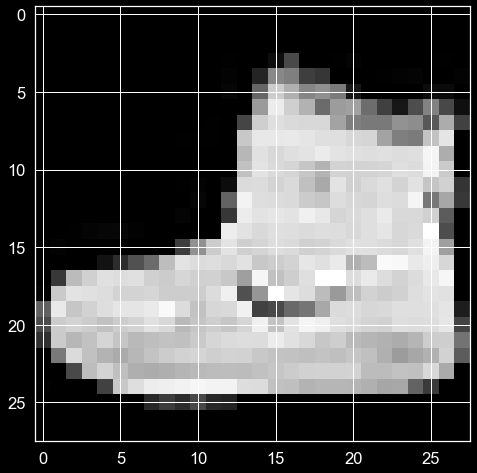

In [43]:
plt.imshow(np.matrix(train_images[0]), cmap="gray")

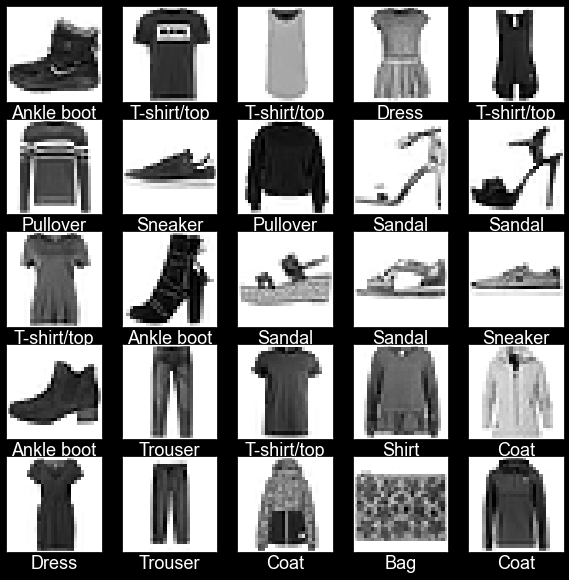

In [44]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [47]:
train_images[0].shape

(28, 28)

In [70]:
%%time
model = Sequential([
    tfk.layers.Flatten(input_shape=(28,28)),
    tfk.layers.Dense(128, activation='relu'),
    tfk.layers.Dense(10)]
)

CPU times: total: 15.6 ms
Wall time: 19 ms


In [73]:
%%time
model.compile(optimizer='adam', loss=tfk.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

CPU times: total: 15.6 ms
Wall time: 9.97 ms


In [74]:
%%time
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5001 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3735 - accuracy: 0.8666
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3374 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3106 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2759 - accuracy: 0.8982
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2660 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2543 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2459 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

<AxesSubplot:>

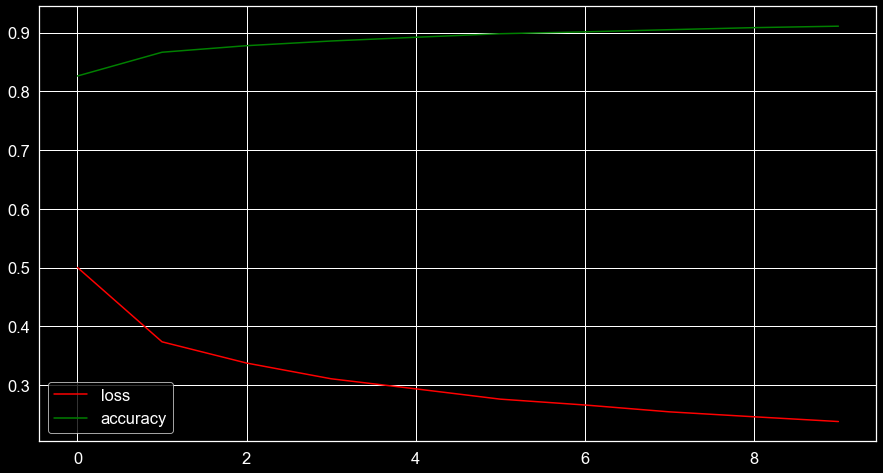

In [84]:
pd.DataFrame(model.history.history).plot(color=['red','green'])

In [85]:
%%time
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3359 - accuracy: 0.8798 - 746ms/epoch - 2ms/step
CPU times: total: 1.28 s
Wall time: 819 ms


[0.33588775992393494, 0.879800021648407]

# <font color = 'hotpink'> `train`> `test` implies model is overfitting </font>

# <font color = 'limegreen'> Make Predictions </font>

In [86]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [87]:
predictions = probability_model.predict(test_images)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

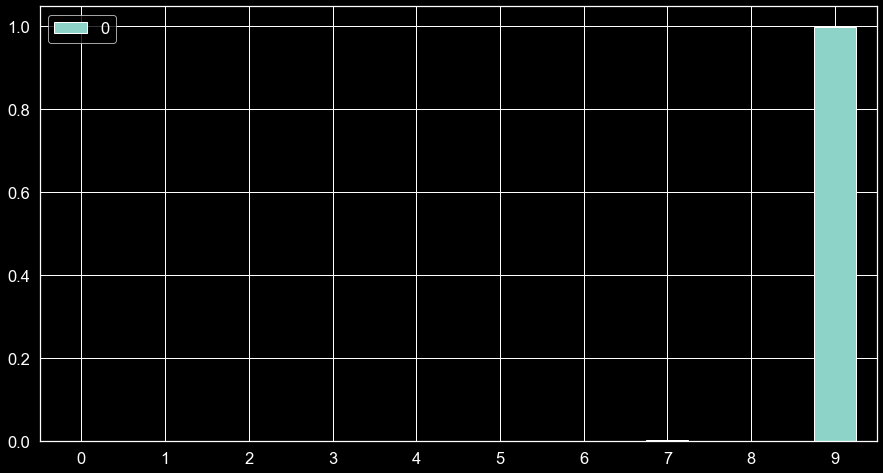

In [99]:
pd.DataFrame(predictions[0]).plot(kind='bar')
plt.xticks(rotation=360)

In [100]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

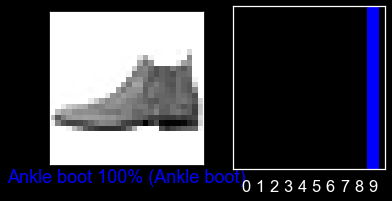

In [101]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

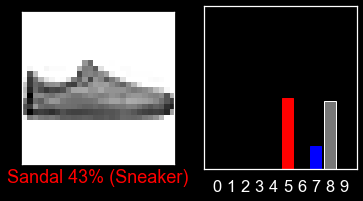

In [102]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [109]:
predictions[12].argmax(), predictions[12].max()

(5, 0.4342889)

<AxesSubplot:>

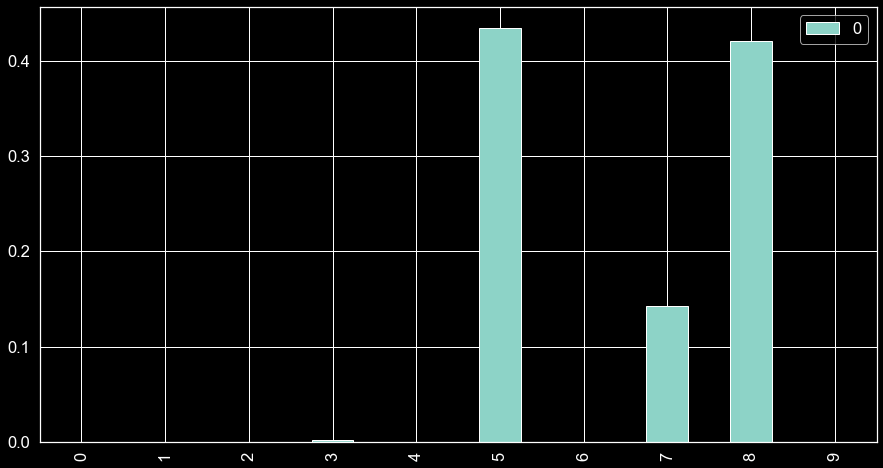

In [107]:
pd.DataFrame(predictions[12]).plot(kind='bar')

In [111]:
sns.set_context("notebook", font_scale=1.125, rc={"lines.linewidth":1.23})


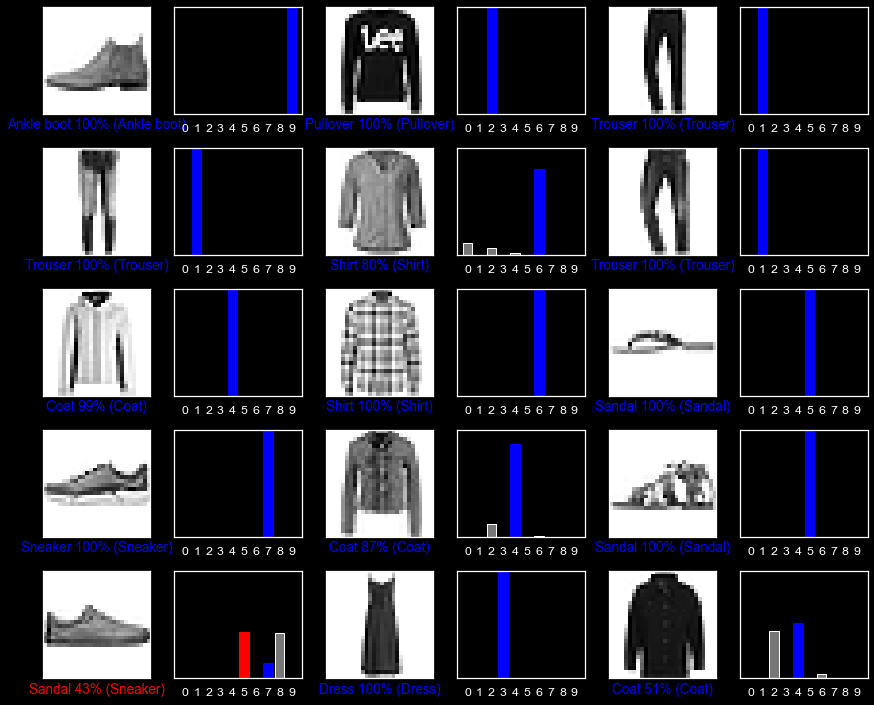

In [112]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [113]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [114]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [124]:
img.shape

(1, 28, 28)

In [138]:
def graph(xx):
    _ = pd.DataFrame(xx)
    sns.barplot(_)

In [139]:
probability_model.predict(np.expand_dims(test_images[5],0))

array([[6.4142363e-08, 9.9999964e-01, 2.4116125e-09, 8.7983800e-08,
        5.7790505e-08, 1.0840516e-11, 7.6799843e-08, 8.0763458e-22,
        1.7560085e-11, 8.4414523e-17]], dtype=float32)

In [115]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[6.7567898e-06 3.4812940e-13 9.9952030e-01 1.6296537e-12 4.2767479e-04
  1.6278768e-12 4.5254379e-05 8.8113597e-22 9.8581932e-10 9.2360595e-14]]


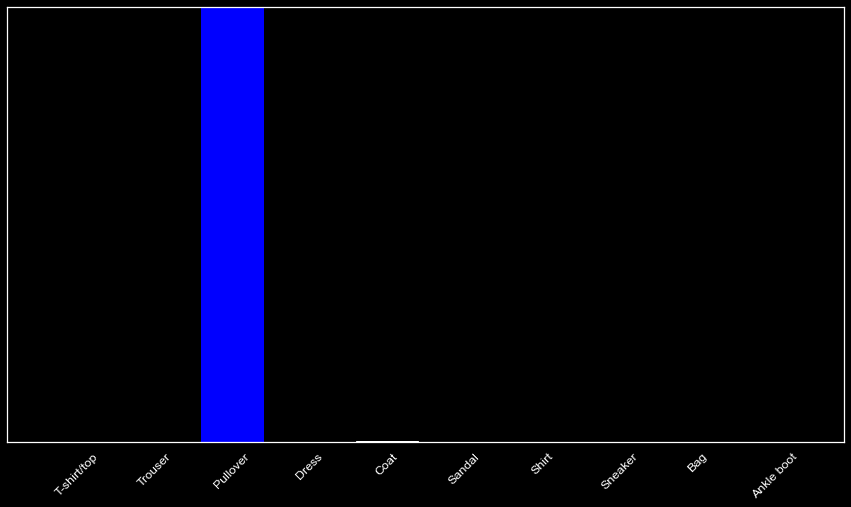

In [116]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [117]:
np.argmax(predictions_single[0])

2